In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization

data = pd.read_csv("BreastCancerDetection.csv")

#remove the last column
data =data.iloc[:,1:-1]


In [2]:
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

X_standard = X.apply(zscore)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

In [3]:
X_train.shape

(426, 30)

In [4]:
X_test.shape

(143, 30)

# SVM

In [5]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [6]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

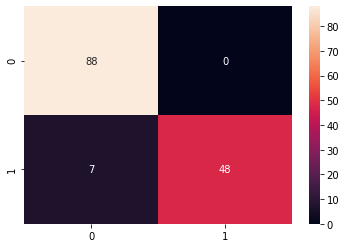

In [7]:
sns.heatmap(cm, annot=True)

In [8]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        88
           M       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



# Improve the model

In [9]:
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))
X_standard = X.apply(zscore)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)

              precision    recall  f1-score   support

           B       0.98      0.99      0.98        88
           M       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



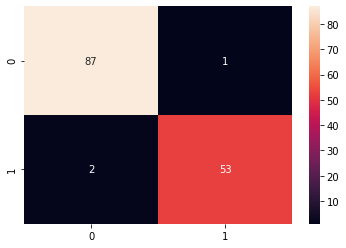

In [10]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

# Improve version 2

In [11]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [12]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.942, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.977, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.965, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [13]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [14]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [15]:
X_test.shape

(143, 30)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



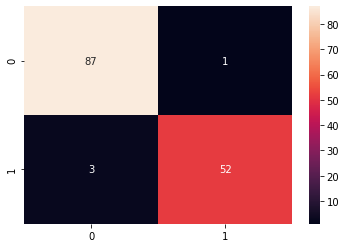

In [16]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

#  KNN

In [17]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        88
           M       1.00      0.91      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



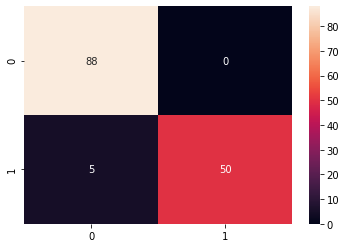

In [18]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predict))

# K means

In [19]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#looking for exceptions
from scipy.stats import zscore


z = np.abs(zscore(data.iloc[:,1:]))
X_standard = X.apply(zscore)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=5)

In [32]:
X_area_mean = data['area_mean']
X_smoothness_mean=data["smoothness_mean"]
X_radius_mean= data["radius_mean"]
y = data['diagnosis']

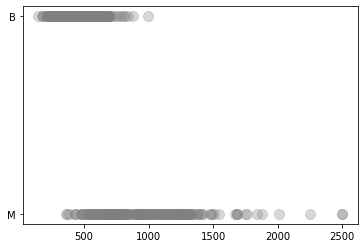

In [29]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

plt.scatter(X_area_mean, y, c='gray', s=50 * 2, alpha=0.3);

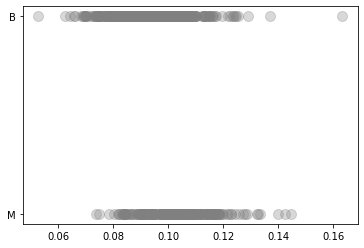

In [30]:
plt.scatter(X_smoothness_mean, y, c='gray', s=50 * 2, alpha=0.3);

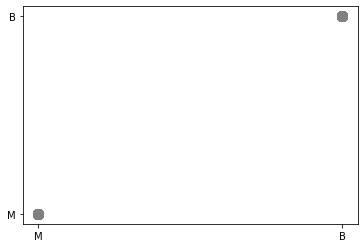

In [31]:
plt.scatter(y, y, c='gray', s=50 * 2, alpha=0.3);

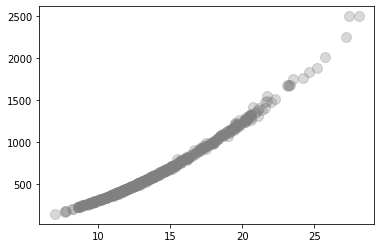

In [35]:
plt.scatter(X_radius_mean, X_area_mean, c='gray', s=50 * 2, alpha=0.3);

In [51]:

X_new = np.c_[X_area_mean, y]
X_new


array([[1001.0, 'M'],
       [1326.0, 'M'],
       [1203.0, 'M'],
       ...,
       [858.1, 'M'],
       [1265.0, 'M'],
       [181.0, 'B']], dtype=object)

# decision_tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

 # Naive Bayes


In [ ]:
from sklearn.preprocessing import StandardScaler
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
y = data['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
data

In [ ]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [ ]:
sum(y_test)

# Logistic Regression


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)



LogisticRegression(random_state=0)

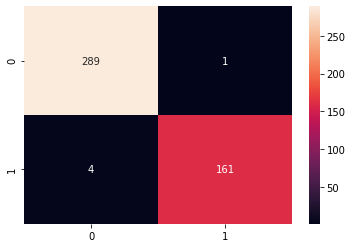

In [54]:
y_predict_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [66]:
#plt.scatter(y_test, y_predict_test)
#plt.plot(X_train, y_train, linewidth=5, color='orange');

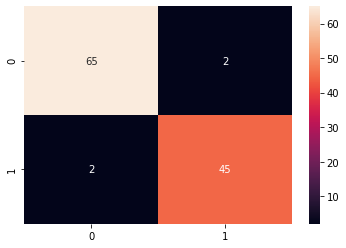

In [55]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# neural network multi layer perspetron


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = MLPClassifier()

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

In [ ]:
  from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

# bernuli&linear regression

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict)))


sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# Gradient Decent 

In [72]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
start = time.time()
accuracy_selection=[]
cvs_selection=[]

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 95.61%
Cross validation score: 95.61% (+/- 1.91%)
Execution time: 0.020737 seconds 

